# Data Preprocessing

In [264]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt

# List nama file
file_names = [f"data{i}.xlsx" for i in range(1, 12)]

# Inisialisasi dataframe kosong untuk menyimpan data gabungan
combined_df = pd.DataFrame()

# Looping untuk membaca setiap file dan menggabungkan datanya
for file in file_names:
    df = pd.read_excel(file)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Ubah nama kolom menjadi nama bulan
for i in range(1, 13):
    month_name = calendar.month_name[i]
    combined_df = combined_df.rename(columns={combined_df.columns[i]: month_name})

# Ubah nama kolom Unnamed: 13 menjadi "Tahunan"
combined_df = combined_df.rename(columns={combined_df.columns[13]: 'Tahunan'})

# hapus data nan 
combined_df = combined_df.dropna()

# Tambahkan kolom "Tahun" dengan nilai tahun yang sesuai dengan pola yang diinginkan
combined_df['Tahun'] = [str(year) for year in range(2014, 2014 + (len(combined_df) // 3)) for _ in range(3)]

# Simpan dataframe gabungan ke file Excel baru
combined_df.to_excel("data_merge_with_monthly_yearly.xlsx", index=False)


combined_df.head(100)

,Pintu Masuk Wisman,January,February,March,April,May,June,July,August,September,October,November,December,Tahunan,Tahun
2,Bandara Ngurah Rai,278685,269367,268418,277925,285965,329654,358907,336628,352017,339200,293858,341111,3731735,2014
3,Pelabuhan Laut,572,6428,8155,2171,68,742,2159,135,2745,2451,3018,6259,34903,2014
4,Jumlah,279257,275795,276573,280096,286033,330396,361066,336763,354762,341651,296876,347370,3766638,2014
11,Bandara Ngurah Rai,288755,333072,294737,309888,287141,357712,381890,298638,379397,366759,262180,363780,3923949,2015
12,Pelabuhan Laut,12993,5919,10535,3875,8832,1990,793,4983,9663,2688,8755,6860,77886,2015
13,Jumlah,301748,338991,305272,313763,295973,359702,382683,303621,389060,369447,270935,370640,4001835,2015
20,Bandara Ngurah Rai,343663,367024,354778,367370,394443,405686,482201,437929,442304,423140,396150,437946,4852634,2016
21,Pelabuhan Laut,6929,8720,9335,13397,114,149,2030,206,3412,9075,17082,4854,75303,2016
22,Jumlah,350592,375744,364113,380767,394557,405835,484231,438135,445716,432215,413232,442800,4927937,2016
29,Bandara Ngurah Rai,452660,447762,422757,474338,486207,503617,591812,599827,550238,462263,358012,307321,5656814,2017


In [265]:
import pandas as pd

# Membaca file Excel
file_path = "data_merge_with_monthly_yearly.xlsx"
df = pd.read_excel(file_path)

# Menghapus semua baris yang memiliki "Jumlah"
df = df[~df.iloc[:, 0].str.contains("Jumlah", na=False)]

# Menghapus kolom "Tahunan"
df = df.drop(columns=['Tahunan'])

# Memisahkan data "Bandara Ngurah Rai" dan "Pelabuhan Laut"
bandara_df = df[df['Pintu Masuk Wisman'] == 'Bandara Ngurah Rai']
pelabuhan_df = df[df['Pintu Masuk Wisman'] == 'Pelabuhan Laut']

# Menggabungkan data berdasarkan Tahun
merged_df = pd.merge(bandara_df, pelabuhan_df, on='Tahun', suffixes=('_Bandara', '_Pelabuhan'))

# Menyusun ulang data untuk menghitung total wisatawan setiap bulan
bulan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data_bulan = []

for month in bulan:
    bulan_bandara = f'{month}_Bandara'
    bulan_pelabuhan = f'{month}_Pelabuhan'
    tahun = merged_df['Tahun']
    
    for index, row in merged_df.iterrows():
        total_wisatawan_bandara = row[bulan_bandara]
        total_wisatawan_pelabuhan = row[bulan_pelabuhan]
        
        # Memeriksa jika nilai "-" atau "--", dan skip jika ada
        if total_wisatawan_bandara == "-" or total_wisatawan_bandara == "--" or total_wisatawan_pelabuhan == "-" or total_wisatawan_pelabuhan == "--":
            continue
        
        # Menghitung total wisatawan
        total_wisatawan = total_wisatawan_bandara + total_wisatawan_pelabuhan
        data_bulan.append([tahun[index], month, total_wisatawan])

# Membuat DataFrame baru dari data bulan
df_total_wisatawan = pd.DataFrame(data_bulan, columns=['Tahun', 'Bulan', 'Total Wisatawan'])

# Mengurutkan berdasarkan tahun
df_total_wisatawan = df_total_wisatawan.sort_values(by=['Tahun'])

# Menyimpan hasil ke file Excel baru
output_path = "data_cleaned_monthly_total_sorted_cleaned.xlsx"
df_total_wisatawan.to_excel(output_path, index=False)

# Menampilkan 100 baris pertama dari DataFrame yang telah dibersihkan, diubah format, diurutkan, dan data tidak valid dihapus
print(df_total_wisatawan.head(200))


     Tahun     Bulan Total Wisatawan
0     2014   January          279257
52    2014      June       329654742
42    2014       May        28596568
72    2014    August       336628135
32    2014     April      2779252171
..     ...       ...             ...
81    2023    August        52206378
61    2023      June        47812771
121   2023  December      4783823264
21    2024  February          454801
10    2024   January          420037

[122 rows x 3 columns]


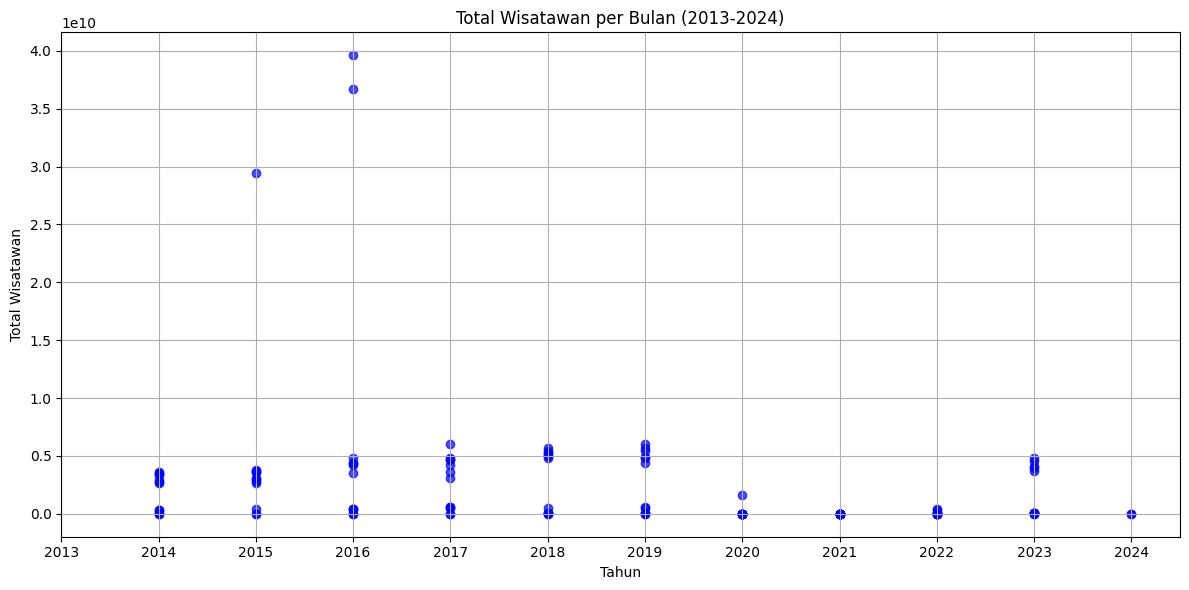

In [266]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file Excel dengan data yang sudah dibersihkan dan dihitung
file_path = "data_cleaned_monthly_total_sorted_cleaned.xlsx"
df = pd.read_excel(file_path)

# Menyiapkan data untuk visualisasi
tahun = df['Tahun']
total_wisatawan = df['Total Wisatawan']

# Membuat scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(tahun, total_wisatawan, marker='o', color='blue', alpha=0.7)

# Menambahkan judul dan label sumbu
plt.title('Total Wisatawan per Bulan (2013-2024)')
plt.xlabel('Tahun')
plt.ylabel('Total Wisatawan')

# Menampilkan grid
plt.grid(True)

# Menyertakan tahun 2013 hingga 2024 di sumbu x
plt.xticks(range(2013, 2025))

# Menampilkan plot
plt.tight_layout()
plt.show()


# Visualisasi Total Kunjungan ke Bali

Data bandara Ngurah rai dijumlahkan dengan data pelabuhan laut sehingga mendapatkan total kunjungan wisatawa

Prediksi total wisatawan di bulan Maret 2024: -54367556.69
Mean Squared Error: 55782217012430127104.00
Coefficient of Determination (R^2): 0.06


/Users/widyadnyana/Developer/python/linear_regression/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


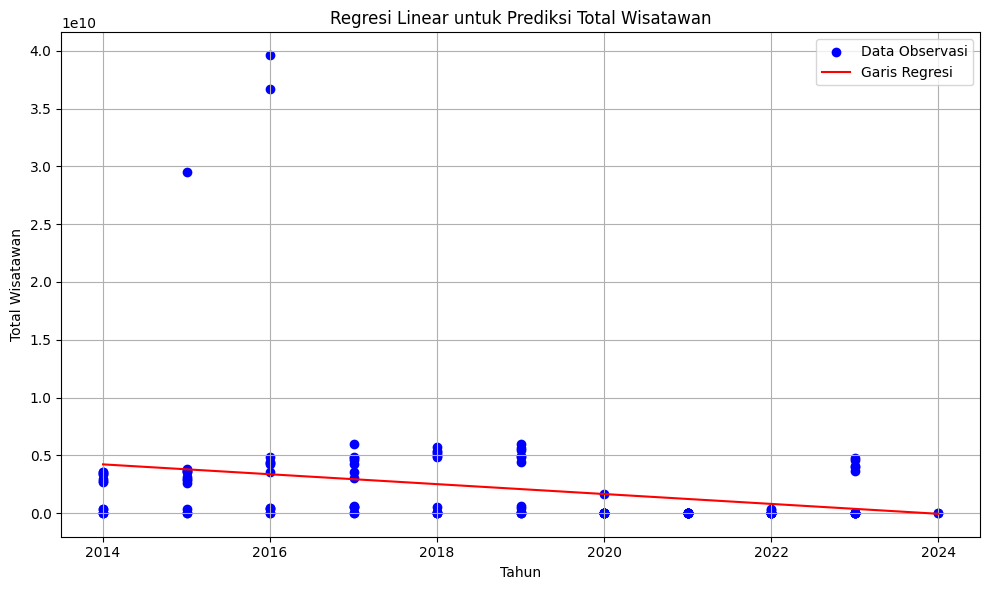

In [267]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Membaca file Excel yang telah dibersihkan dan diurutkan sebelumnya
file_path = "data_cleaned_monthly_total_sorted_cleaned.xlsx"
df_total_wisatawan = pd.read_excel(file_path)

# Memilih fitur yang diperlukan
X = df_total_wisatawan[['Tahun']]
y = df_total_wisatawan['Total Wisatawan']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi total wisatawan untuk bulan Maret 2024 (tahun 2024)
tahun_prediksi = 2024
prediksi_maret_2024 = model.predict([[tahun_prediksi]])
print(f"Prediksi total wisatawan di bulan Maret 2024: {prediksi_maret_2024[0]:.2f}")

# Evaluasi model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of Determination (R^2): {r2_score(y_test, y_pred):.2f}")

# Visualisasi hasil regresi linear
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Observasi')
plt.plot(X, model.predict(X), color='red', label='Garis Regresi')
plt.title('Regresi Linear untuk Prediksi Total Wisatawan')
plt.xlabel('Tahun')
plt.ylabel('Total Wisatawan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Fitting Model Regresi Linear

In [268]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Membaca data dari file Excel
file_path = 'data_clean.xlsx'
df = pd.read_excel(file_path)

# Data tahun (kolom) dan jumlah wisatawan (baris untuk Bandara Ngurah Rai dan Pelabuhan Laut)
years = np.array(df.columns[1:-1], dtype=int)

# Data kunjungan Bandara Ngurah Rai dan Pelabuhan Laut
X_bandara = df.loc[df['Pintu Masuk Wisman'] == 'Bandara Ngurah Rai'].values[0, 1:-1].astype(float)
X_pelabuhan = df.loc[df['Pintu Masuk Wisman'] == 'Pelabuhan Laut'].values[0, 1:-1].astype(float)

# Data total kunjungan (gabungan Bandara Ngurah Rai dan Pelabuhan Laut)
X_total = X_bandara + X_pelabuhan

# Model Regresi Linear untuk Total Wisatawan
model_total = LinearRegression()
model_total.fit(years.reshape(-1, 1), X_total)

FileNotFoundError: [Errno 2] No such file or directory: 'data_clean.xlsx'

# Visualisasi hasil training regresi linear

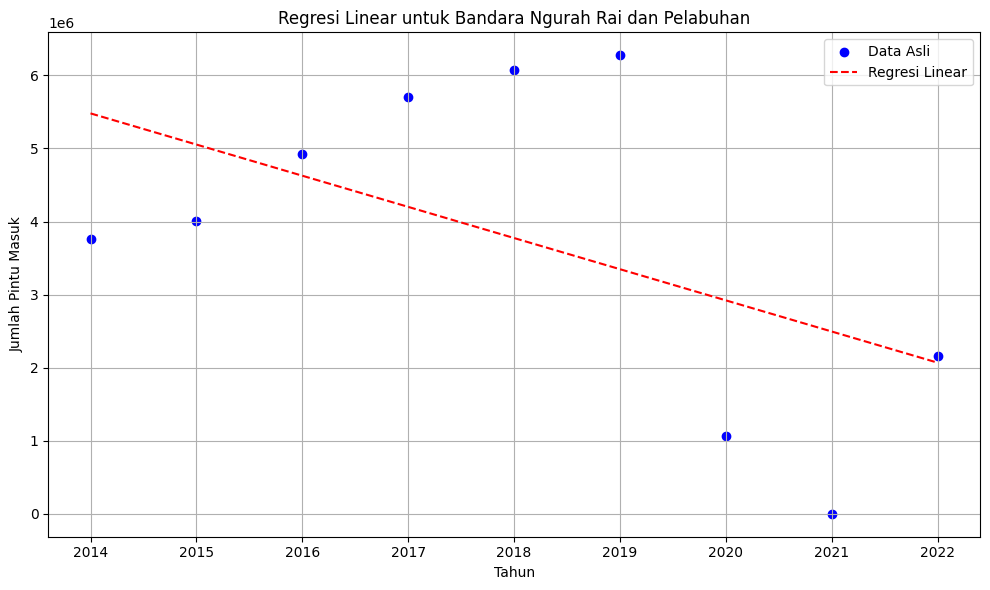

In [ ]:
# Plot data asli dan garis regresi untuk Bandara Ngurah Rai dan pelabuhan
plt.figure(figsize=(10, 6))
plt.scatter(years, X_total, color='blue', label='Data Asli')
plt.plot(years, model_total.predict(years.reshape(-1, 1)), color='red', linestyle='--', label='Regresi Linear')
plt.title('Regresi Linear untuk Bandara Ngurah Rai dan Pelabuhan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pintu Masuk')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluasi model

In [ ]:
# Evaluasi model
y_pred = model_total.predict(years.reshape(-1, 1))
mse = mean_squared_error(X_total, y_pred)
mae = mean_absolute_error(X_total, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((X_total - y_pred) / X_total)) * 100

# Menampilkan hasil evaluasi
print("\nEvaluasi Model:")
print(f"MSE (Mean Squared Error): {mse:.2f} - Nilai MSE yang lebih rendah menunjukkan model yang lebih baik.")
print(f"MAE (Mean Absolute Error): {mae:.2f} - Nilai MAE yang lebih rendah menunjukkan model yang lebih akurat.")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f} - Nilai RMSE yang lebih rendah menunjukkan prediksi model yang lebih baik.")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}% - Nilai MAPE yang lebih rendah menunjukkan model yang lebih akurat dalam persentase.")


Evaluasi Model:
MSE (Mean Squared Error): 3319699760889.69 - Nilai MSE yang lebih rendah menunjukkan model yang lebih baik.
MAE (Mean Absolute Error): 1580122.24 - Nilai MAE yang lebih rendah menunjukkan model yang lebih akurat.
RMSE (Root Mean Squared Error): 1822004.33 - Nilai RMSE yang lebih rendah menunjukkan prediksi model yang lebih baik.
MAPE (Mean Absolute Percentage Error): 543489.60% - Nilai MAPE yang lebih rendah menunjukkan model yang lebih akurat dalam persentase.


# Prediksi jumlah wisatawan untuk tahun 2024


In [ ]:
# Prediksi jumlah wisatawan untuk tahun 2024
year_predict = np.array([[2024]])
total_prediksi = model_total.predict(year_predict)
total_prediksi_rounded = int(round(total_prediksi[0]))

# Menampilkan hasil prediksi
print(f"Prediksi jumlah wisatawan total untuk tahun 2024: {total_prediksi_rounded}")

Prediksi jumlah wisatawan total untuk tahun 2024: 1215063


# Visualisasi hasil Prediksi


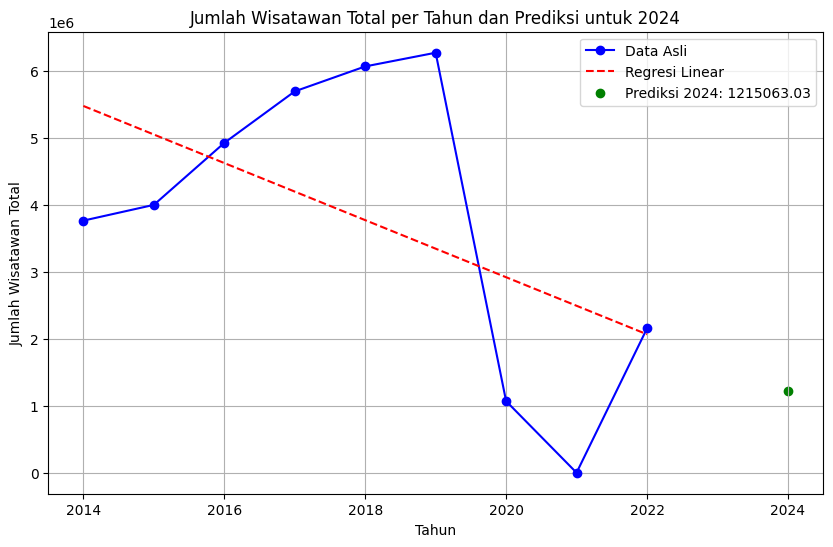

In [ ]:
# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(years, X_total, marker='o', linestyle='-', color='b', label='Data Asli')
plt.plot(years, y_pred, color='r', linestyle='--', label='Regresi Linear')
plt.scatter(year_predict, total_prediksi, color='g', label=f'Prediksi 2024: {total_prediksi[0]:.2f}')

# Menambahkan judul dan label
plt.title('Jumlah Wisatawan Total per Tahun dan Prediksi untuk 2024')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Wisatawan Total')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()